# Laboratorio 07: Ecuaciones Diferenciales.

---
### Profesores: Juan Marcos Marín Ramírez, Daniel Ruiz Mejía
### Nombre: José Nicolás Rodriguez Montoya
*Métodos computacionales 2025-I*

---

# 1.

En una cadena de desintegración radiactiva, el elemento $A$ se desintegra en el elemento $B$, que a su vez se desintegra en $C$, y así sucesivamente hasta que la cadena de desintegración alcanza un elemento estable. Un ejemplo de tal cadena es $^{90}Sr$, que se desintegra en $^{90}Y$, que a su vez se desintegra a a $^{90}Zr$. La vida media de $^{90}Sr$ es de 28.78 años, y la vida media de $^{90}Y$ es de 2.67 días. $^{90}Zr$ es estable. Esta cadena de desintegración puede describirse mediante las siguientes ecuaciones diferenciales:

$$
\frac{dN_{Sr}}{dt} = -\lambda_{Sr}N_{Sr}
$$

$$
\frac{dN_{Y}}{dt} = -\lambda_{Y}N_{Y} - \frac{dN_{Sr}}{dt}
$$

Grafique la actividad relativa de una muestra de $^{90}Sr$ y otra gráfica de $^{90}Y$ en función del tiempo utlizando el método de Euler. (Una escala de tiempo logarítmica será útil).

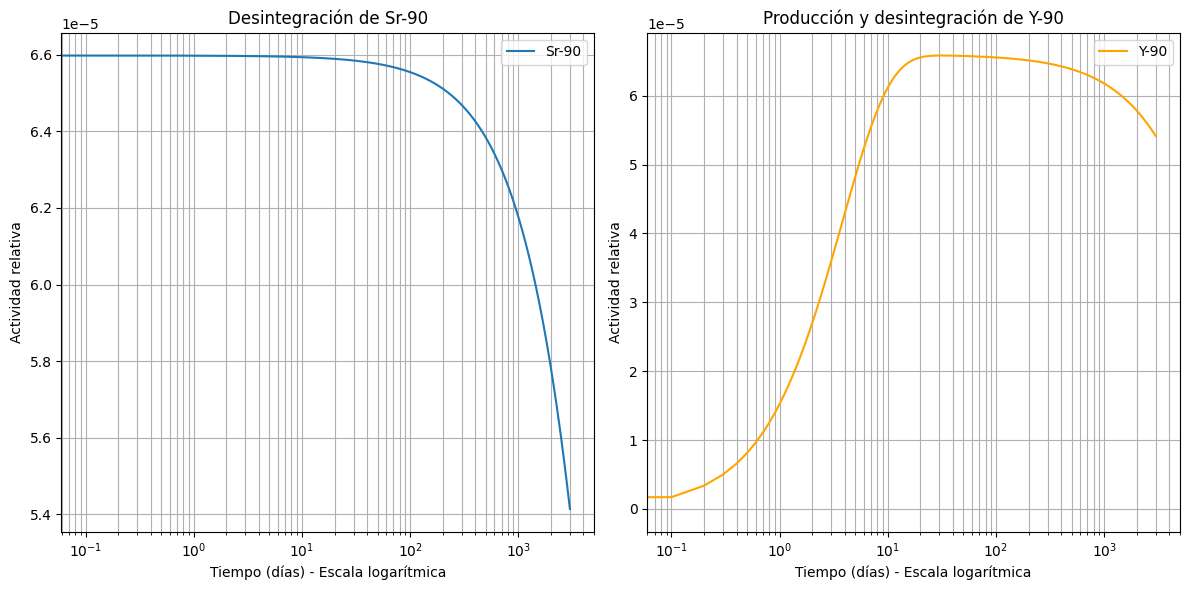

In [ ]:
# Aquí va su código
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constantes
lambda_Sr = np.log(2) / (28.78 * 365)  # Convertir años a días y calcular constante de desintegración
lambda_Y = np.log(2) / 2.67  # Vida media de Y-90 en días

# Condiciones iniciales
N_Sr0 = 1.0  # Actividad inicial normalizada
N_Y0 = 0.0   # Inicialmente no hay Y-90

# Parámetros de la simulación
t_max = 3000  # días (aproximadamente 8 años)
dt = 0.1      # Paso de tiempo en días

# Inicialización
time_points = np.arange(0, t_max, dt)
N_Sr = np.zeros_like(time_points)
N_Y = np.zeros_like(time_points)

N_Sr[0] = N_Sr0
N_Y[0] = N_Y0

# Método de Euler
for i in range(1, len(time_points)):
    dN_Sr = -lambda_Sr * N_Sr[i-1] * dt
    N_Sr[i] = N_Sr[i-1] + dN_Sr

    dN_Y = (lambda_Sr * N_Sr[i-1] - lambda_Y * N_Y[i-1]) * dt
    N_Y[i] = N_Y[i-1] + dN_Y

# Calcular actividades (A = lambda * N)
A_Sr = lambda_Sr * N_Sr
A_Y = lambda_Y * N_Y

# Graficar en escala logarítmica
plt.figure(figsize=(12, 6))

# Gráfica de Sr-90
plt.subplot(1, 2, 1)
plt.semilogx(time_points, A_Sr, label='Sr-90')
plt.xlabel('Tiempo (días) - Escala logarítmica')
plt.ylabel('Actividad relativa')
plt.title('Desintegración de Sr-90')
plt.grid(True, which="both", ls="-")
plt.legend()

# Gráfica de Y-90
plt.subplot(1, 2, 2)
plt.semilogx(time_points, A_Y, label='Y-90', color='orange')
plt.xlabel('Tiempo (días) - Escala logarítmica')
plt.ylabel('Actividad relativa')
plt.title('Producción y desintegración de Y-90')
plt.grid(True, which="both", ls="-")
plt.legend()

plt.tight_layout()
plt.show()


# 2.

Este circuito actúa como un filtro pasabajas: envías una señal por la izquierda y sale alterada por la derecha.

<center>

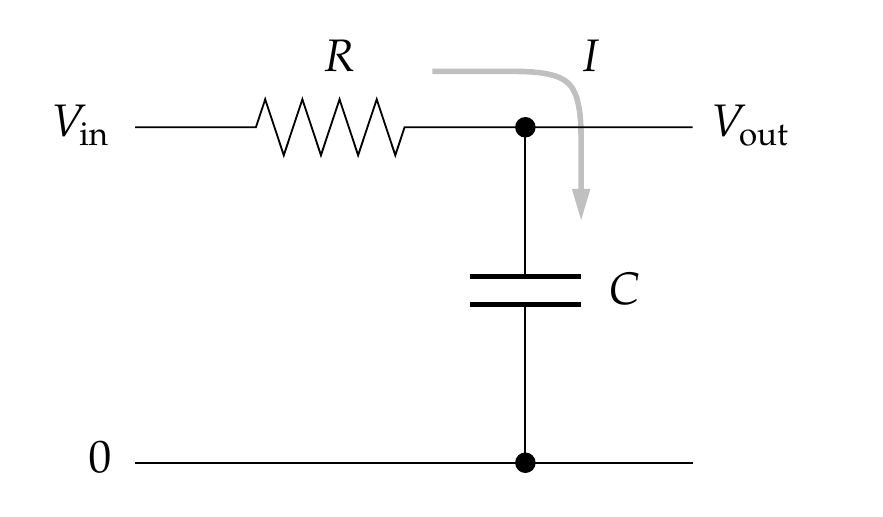

</center>

Usando la ley de Ohm y la ley del capacitor, y asumiendo que la impedancia de la carga de salida es muy alta, de modo que fluye una cantidad despreciable de corriente a través de ella, podemos escribir las ecuaciones que gobiernan este circuito de la siguiente manera. Sea $I$ la corriente que fluye a través de $R$ y hacia el capacitor, y sea $Q$ la carga en el capacitor. Entonces:

$$IR = V_{in} - V_{out}, \quad Q = CV_{out}, \quad I = \frac{dQ}{dt} $$

Sustituyendo la segunda ecuación en la tercera, y luego sustituyendo el resultado en la primera ecuación, encontramos que $ V_{\text{in}} - V_{\text{out}} = RC \left( \frac{dV_{\text{out}}}{dt} \right)$ , o equivalentemente

$$\frac{dV_{\text{out}}}{dt} = \frac{1}{RC} \left( V_{\text{in}} - V_{\text{out}} \right).$$

Escriba un programa para resolver esta ecuación para $V_{\text{out}}(t) $ usando el método de Runge-Kutta de cuarto orden cuando la señal de entrada es una onda cuadrada con frecuencia 1 y amplitud 1:

$$V_{\text{in}}(t) =
\begin{cases}
1 & \text{si } \lfloor 2t \rfloor \text{ es par}, \\
-1 & \text{si } \lfloor 2t \rfloor \text{ es impar},
\end{cases}$$

donde $\lfloor x \rfloor$ significa $x$ redondeado hacia abajo al siguiente entero más bajo. Grafique la salida del circuito filtro desde $t=0$ hasta $t=10$ cuando $RC=0.01, 0.1$ y $1$, con la condición inicial $V_{\text{out}}(0) = 0 $.

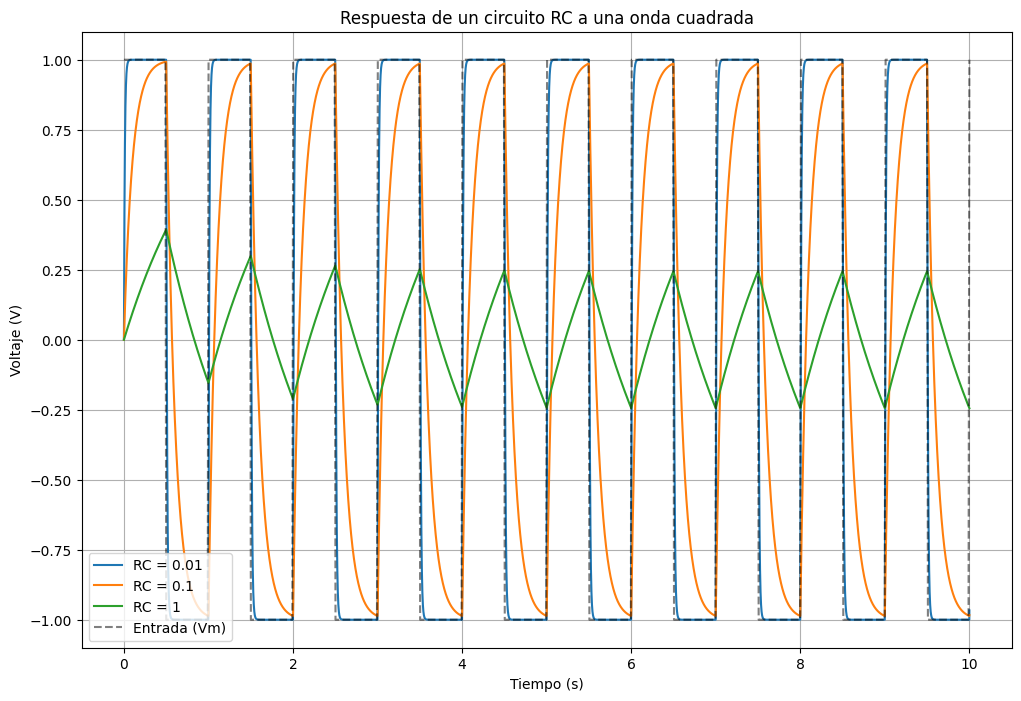

In [ ]:
# Aquí va su código

def square_wave(t):
    """Función que genera una onda cuadrada con amplitud 1 y frecuencia 1"""
    return 1 if np.floor(2 * t) % 2 == 0 else -1

def rk4_step(f, y, t, h):
    """Un paso del método Runge-Kutta de cuarto orden"""
    k1 = f(y, t)
    k2 = f(y + 0.5 * h * k1, t + 0.5 * h)
    k3 = f(y + 0.5 * h * k2, t + 0.5 * h)
    k4 = f(y + h * k3, t + h)
    return y + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)

def solve_rc_circuit(RC, t_end=10, h=0.001):
    """Resuelve el circuito RC para un valor dado de RC"""
    # Definimos la ecuación diferencial: dVout/dt = (Vm(t) - Vout)/(RC)
    def dVout_dt(Vout, t):
        Vm = square_wave(t)
        return (Vm - Vout) / RC

    # Condiciones iniciales
    t_values = np.arange(0, t_end + h, h)
    Vout_values = np.zeros_like(t_values)
    Vout_values[0] = 0  # Condición inicial Vout(0) = 0

    # Resolver usando RK4
    for i in range(1, len(t_values)):
        Vout_values[i] = rk4_step(dVout_dt, Vout_values[i-1], t_values[i-1], h)

    return t_values, Vout_values

# Parámetros del problema
RC_values = [0.01, 0.1, 1]
t_end = 10


plt.figure(figsize=(12, 8))

# Resolver y graficar para cada valor de RC
for RC in RC_values:
    t, Vout = solve_rc_circuit(RC, t_end)
    plt.plot(t, Vout, label=f'RC = {RC}')

t_input = np.linspace(0, t_end, 1000)
Vm_input = np.array([square_wave(t) for t in t_input])
plt.plot(t_input, Vm_input, 'k--', label='Entrada (Vm)', alpha=0.5)

# Configuración del gráfico
plt.title('Respuesta de un circuito RC a una onda cuadrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje (V)')
plt.grid(True)
plt.legend()
plt.show()

# 3.

La ecuación logística es un modelo de ecuación diferencial simple que se puede utilizar para relacionar el cambio en la población $\frac{dP}{dt}$ con la población actual, $P$, dada una tasa de crecimiento, $r$, y una capacidad de carga, $K$. La ecuación logística se puede expresar como

$$
\frac{dP}{dt} = rP \left( 1 - \frac{P}{K} \right).
$$

Escriba una función `my_logistic_eq(t, P, r, K)` que represente la ecuación logística con un retorno de `dP`. Tenga en cuenta que este formato permite que `my_logistic_eq` se utilice como un argumento de entrada para `solve_ivp`. Suponga que los argumentos `dP`, `t`, `P`, `r` y `K` son todos escalares, y `dP` es el valor $\frac{dP}{dt}$ dado $r$, $P$ y $K$.
Tenga en cuenta que la ecuación logística tiene una solución analítica definida por

$$
P(t) = \frac{K P_0 e^{rt}}{K + P_0 (e^{rt} - 1)}
$$
donde $P_0$ es la población inicial.

- Grafique $P$ vs $t$ utilizando el método de Euler y de RK4, comparando con la solución analítica.
- Calcule el error relativo de ambas soluciones, considerando la solución analítica como referencia

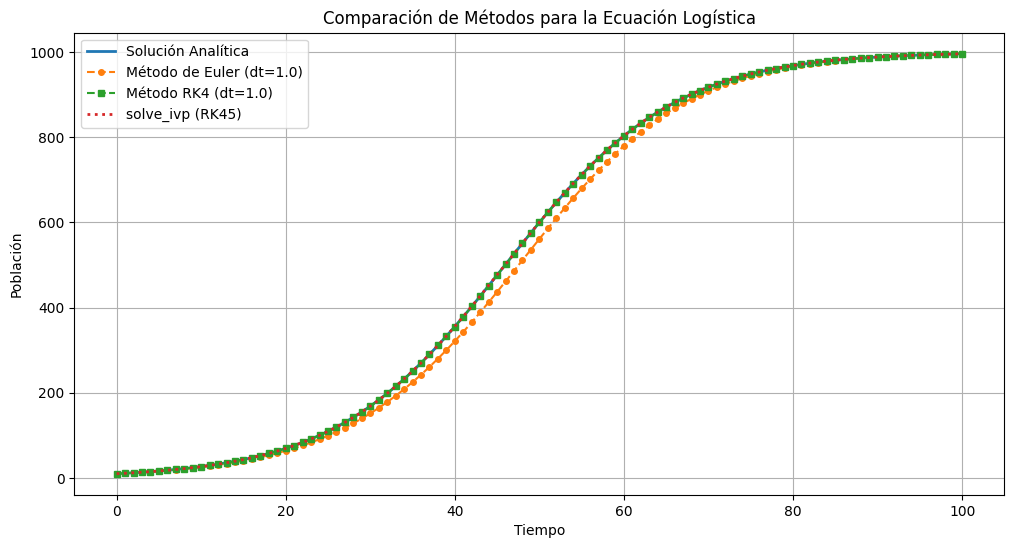

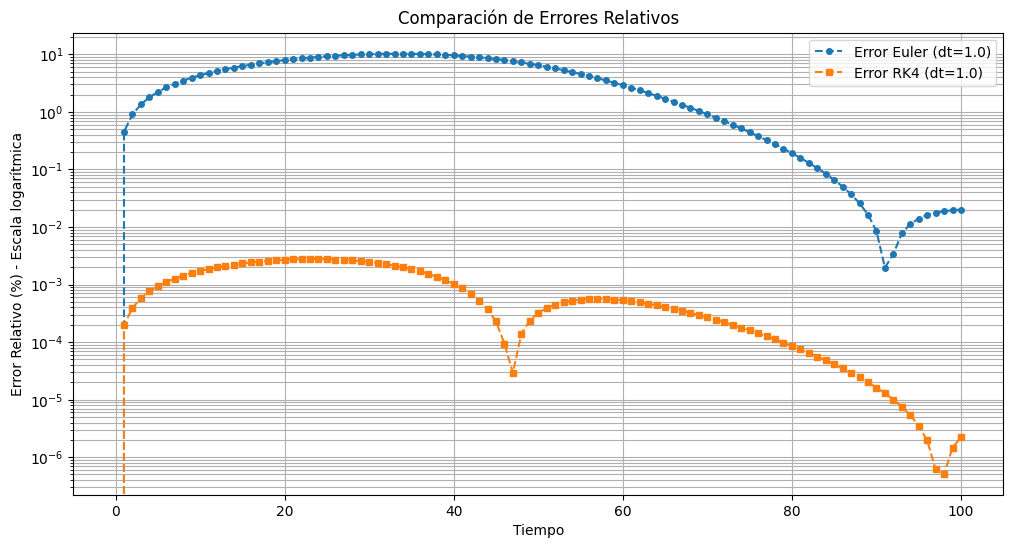

Error máximo relativo:
Euler: 10.2743%
RK4: 0.0028%

Error medio relativo:
Euler: 4.2459%
RK4: 0.0009%


In [ ]:
## 1. Definición de la ecuación logística
def my_logistic_eq(t, P, r, K):
    """
    Ecuación logística para usar con solve_ivp
    Args:
        t: tiempo (no se usa directamente en la ecuación, pero necesario para solve_ivp)
        P: población actual
        r: tasa de crecimiento
        K: capacidad de carga
    Returns:
        dp: valor de dP/dt
    """
    dp = r * P * (1 - P/K)
    return dp

## 2. Solución analítica
def analytical_solution(t, P0, r, K):
    """
    Solución analítica de la ecuación logística
    Args:
        t: array de tiempos
        P0: población inicial
        r: tasa de crecimiento
        K: capacidad de carga
    Returns:
        P: array con valores de población para cada t
    """
    return (K * P0 * np.exp(r*t)) / (K + P0 * (np.exp(r*t) - 1))

## 3. Método de Euler
def euler_method(func, t_span, P0, r, K, dt):
    """
    Implementación del método de Euler
    Args:
        func: función de la ecuación diferencial
        t_span: tupla con tiempo inicial y final
        P0: población inicial
        r: tasa de crecimiento
        K: capacidad de carga
        dt: paso de tiempo
    Returns:
        t: array de tiempos
        P: array con solución numérica
    """
    t = np.arange(t_span[0], t_span[1] + dt, dt)
    P = np.zeros_like(t)
    P[0] = P0

    for i in range(1, len(t)):
        P[i] = P[i-1] + func(t[i-1], P[i-1], r, K) * dt

    return t, P


def rk4_method(func, t_span, P0, r, K, dt):
    """
    Implementación del método Runge-Kutta de 4to orden
    Args:
        func: función de la ecuación diferencial
        t_span: tupla con tiempo inicial y final
        P0: población inicial
        r: tasa de crecimiento
        K: capacidad de carga
        dt: paso de tiempo
    Returns:
        t: array de tiempos
        P: array con solución numérica
    """
    t = np.arange(t_span[0], t_span[1] + dt, dt)
    P = np.zeros_like(t)
    P[0] = P0

    for i in range(1, len(t)):
        k1 = func(t[i-1], P[i-1], r, K)
        k2 = func(t[i-1] + dt/2, P[i-1] + k1*dt/2, r, K)
        k3 = func(t[i-1] + dt/2, P[i-1] + k2*dt/2, r, K)
        k4 = func(t[i-1] + dt, P[i-1] + k3*dt, r, K)

        P[i] = P[i-1] + (k1 + 2*k2 + 2*k3 + k4) * dt / 6

    return t, P


r = 0.1  # Tasa de crecimiento
K = 1000 # Capacidad de carga
P0 = 10  # Población inicial
t_span = (0, 100)  # Intervalo de tiempo
dt = 1.0  # Paso de tiempo


# Solución analítica
t_analytical = np.linspace(t_span[0], t_span[1], 500)
P_analytical = analytical_solution(t_analytical, P0, r, K)

# Solución numérica con Euler
t_euler, P_euler = euler_method(my_logistic_eq, t_span, P0, r, K, dt)

# Solución numérica con RK4
t_rk4, P_rk4 = rk4_method(my_logistic_eq, t_span, P0, r, K, dt)

# Solución con solve_ivp (para referencia)
sol = solve_ivp(my_logistic_eq, t_span, [P0], args=(r, K), t_eval=t_analytical, method='RK45')

## 7. Gráficos
plt.figure(figsize=(12, 6))

plt.plot(t_analytical, P_analytical, label='Solución Analítica', linewidth=2)
plt.plot(t_euler, P_euler, 'o--', label=f'Método de Euler (dt={dt})', markersize=4)
plt.plot(t_rk4, P_rk4, 's--', label=f'Método RK4 (dt={dt})', markersize=4)
plt.plot(sol.t, sol.y[0], ':', label='solve_ivp (RK45)', linewidth=2)

plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.title('Comparación de Métodos para la Ecuación Logística')
plt.legend()
plt.grid(True)
plt.show()

## 8. Cálculo de errores relativos
# Interpolamos la solución analítica en los puntos numéricos
from scipy.interpolate import interp1d

analytical_interp = interp1d(t_analytical, P_analytical)

# Error relativo para Euler
P_analytical_euler = analytical_interp(t_euler)
error_euler = np.abs((P_euler - P_analytical_euler) / P_analytical_euler) * 100

# Error relativo para RK4
P_analytical_rk4 = analytical_interp(t_rk4)
error_rk4 = np.abs((P_rk4 - P_analytical_rk4) / P_analytical_rk4) * 100

# Gráfico de errores
plt.figure(figsize=(12, 6))

plt.semilogy(t_euler, error_euler, 'o--', label=f'Error Euler (dt={dt})', markersize=4)
plt.semilogy(t_rk4, error_rk4, 's--', label=f'Error RK4 (dt={dt})', markersize=4)

plt.xlabel('Tiempo')
plt.ylabel('Error Relativo (%) - Escala logarítmica')
plt.title('Comparación de Errores Relativos')
plt.legend()
plt.grid(True, which="both")
plt.show()

## 9. Resumen de errores
print(f"Error máximo relativo:")
print(f"Euler: {np.max(error_euler):.4f}%")
print(f"RK4: {np.max(error_rk4):.4f}%")

print(f"\nError medio relativo:")
print(f"Euler: {np.mean(error_euler):.4f}%")
print(f"RK4: {np.mean(error_rk4):.4f}%")

# 4.
Considera la ecuación de movimiento para el desplazamiento angular $u$ de un péndulo rígido no lineal de longitud $l$ (donde $g$ es la aceleración gravitacional):

$$
\ddot{u}= -\frac{g}{l} \sin u,
$$

con las condiciones iniciales:

$$
u(0) = u_0, \quad \dot{u}(0) = 0.
$$

El período de oscilaciones de amplitud arbitraria depende explícitamente del desplazamiento inicial $u_0 \in [-\pi, \pi]$:

$$
T = T_0 \frac{2}{\pi} K \left( \alpha \right).
$$

con
$$
T_0=\sqrt{\frac{l}{g}}
$$

$$
\alpha=\sin^2 \frac{u_0}{2}
$$

$$
K(\alpha)=\int_0^1 \frac{dz}{\sqrt{(1-z^2)(1-\alpha z^2)}}.
$$

- Halle la solución $u(t)$ utilizando el método de Runge Kutta con $h=0.001$ y distintos valores de $u_0=1$ y $u_0=\pi/2$.
- Grafique $T/T_0$ en función de $u_0$ y compare con el resultado analítico.

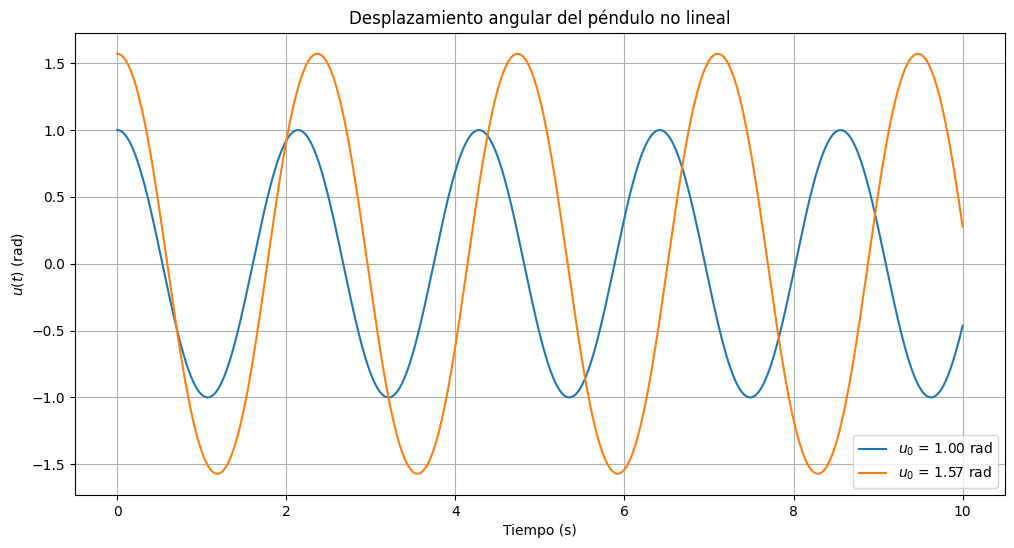

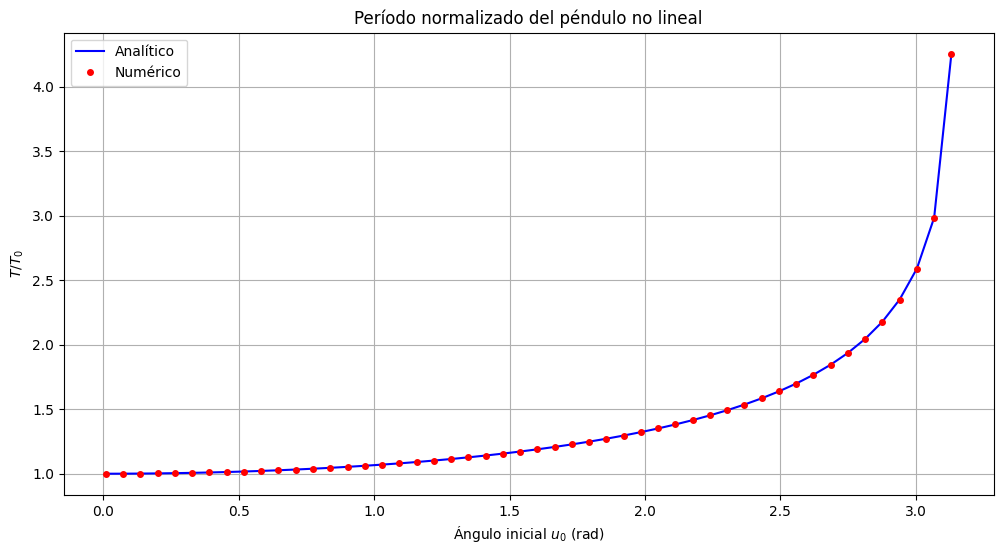

In [ ]:
# Aquí va su código

from scipy.integrate import quad

def pendulum_derivatives(state, t, l, g):
    """Ecuaciones del movimiento para el péndulo no lineal"""
    u, udot = state
    return np.array([udot, -(g/l) * np.sin(u)])

def rk4_step(f, y, t, h, *args):
    """Un paso del método Runge-Kutta de cuarto orden"""
    k1 = f(y, t, *args)
    k2 = f(y + 0.5*h*k1, t + 0.5*h, *args)
    k3 = f(y + 0.5*h*k2, t + 0.5*h, *args)
    k4 = f(y + h*k3, t + h, *args)
    return y + (h/6.0)*(k1 + 2*k2 + 2*k3 + k4)

def solve_pendulum(u0, l=1.0, g=9.81, t_end=10, h=0.001):
    """Resuelve el péndulo no lineal para un ángulo inicial dado"""
    # Condiciones iniciales
    t_values = np.arange(0, t_end + h, h)
    states = np.zeros((len(t_values), 2))
    states[0] = [u0, 0]  # [u(0), udot(0)]

    # Resolver usando RK4
    for i in range(1, len(t_values)):
        states[i] = rk4_step(pendulum_derivatives, states[i-1], t_values[i-1], h, l, g)

    return t_values, states

def analytical_period(u0, l=1.0, g=9.81):
    """Calcula el período analítico del péndulo no lineal"""
    T0 = np.sqrt(l/g)
    if np.abs(u0) < 1e-10:  # Caso de amplitud muy pequeña (péndulo lineal)
        return T0 * 2*np.pi

    alpha = np.sin(u0/2)**2
    # Integral elíptica completa de primera especie
    K, _ = quad(lambda z: 1/np.sqrt((1 - z**2)*(1 - alpha*z**2)), 0, 1)
    return T0 * (2/np.pi) * K

def find_period(t, u):
    """Encuentra el período numéricamente buscando cruces por cero"""
    # Buscamos los puntos donde u cruza cero con pendiente negativa
    crossings = np.where((u[:-1] * u[1:] < 0) & (u[:-1] > 0))[0]

    if len(crossings) < 2:  # No hay suficientes cruces para determinar el período
        return np.nan

    # Calculamos los tiempos de cruce
    t_crossings = []
    for i in crossings:
        # Interpolación lineal para mejor precisión
        t1, t2 = t[i], t[i+1]
        u1, u2 = u[i], u[i+1]
        t_cross = t1 - u1*(t2-t1)/(u2-u1)
        t_crossings.append(t_cross)

    # Calculamos el período como el tiempo entre dos cruces consecutivos
    periods = np.diff(t_crossings)
    return np.mean(periods) * 2  # Período completo (ida y vuelta)

# Parámetros físicos
l = 1.0
g = 9.81
T0 = np.sqrt(l/g)

# Solución para u0 = 1 y u0 = pi/2
u0_values = [1.0, np.pi/2]
t_end = 10

plt.figure(figsize=(12, 6))
for u0 in u0_values:
    t, states = solve_pendulum(u0, l, g, t_end)
    u = states[:, 0]
    plt.plot(t, u, label=f'$u_0$ = {u0:.2f} rad')

plt.title('Desplazamiento angular del péndulo no lineal')
plt.xlabel('Tiempo (s)')
plt.ylabel('$u(t)$ (rad)')
plt.grid(True)
plt.legend()
plt.show()

# Gráfico de T/T0 vs u0 y comparación con el resultado analítico
u0_range = np.linspace(0.01, np.pi-0.01, 50)
T_analytical = np.array([analytical_period(u0, l, g) for u0 in u0_range])
T_numerical = []

for u0 in u0_range:
    # Resolver para tiempo suficiente para medir al menos 2 períodos
    estimated_T = analytical_period(u0, l, g)
    t_end = 3 * estimated_T  # Asegurar al menos 2 períodos completos
    t, states = solve_pendulum(u0, l, g, t_end)
    u = states[:, 0]
    T_num = find_period(t, u)
    T_numerical.append(T_num if not np.isnan(T_num) else estimated_T)

T_numerical = np.array(T_numerical)

plt.figure(figsize=(12, 6))
plt.plot(u0_range, T_analytical/T0, 'b-', label='Analítico')
plt.plot(u0_range, T_numerical/T0, 'ro', markersize=4, label='Numérico')
plt.title('Período normalizado del péndulo no lineal')
plt.xlabel('Ángulo inicial $u_0$ (rad)')
plt.ylabel('$T/T_0$')
plt.grid(True)
plt.legend()
plt.show()

# 5.

Considere un sistema ecológico aislado donde habitan dos especies: conejos ($x$) y zorros ($y$). La dinámica poblacional de ambas especies se describe mediante el siguiente sistema de ecuaciones diferenciales:

$$\frac{dx}{dt} = \alpha x - \beta xy$$
$$\frac{dy}{dt} = -\gamma y + \delta xy$$

Donde:
- $x(t)$ representa la población de conejos en el tiempo t
- $y(t)$ representa la población de zorros en el tiempo t
- $\alpha$ = 0.8 (tasa de reproducción de los conejos)
- $\beta$ = 0.04 (tasa de depredación de conejos por zorros)
- $\gamma$ = 0.3 (tasa de mortalidad natural de los zorros)
- $\delta$ = 0.01 (eficiencia de conversión de presas consumidas en nuevos depredadores)

Condiciones iniciales:
- $x(0)$ = 50 (población inicial de conejos)
- $y(0)$ = 20 (población inicial de zorros)


**a)** Implemente el método de Euler para resolver este sistema con un paso temporal de $h$ = 0.1, simulando la evolución del sistema durante 50 unidades de tiempo.

**b)** Implemente el método de Runge-Kutta de segundo y cuarto orden para resolver el mismo sistema con idénticos parámetros.

**c)** Compare los resultados de Euler y RK4 mediante:
   - Gráficas de la evolución temporal de ambas poblaciones
   - Diagrama de fase ($x$ vs $y$)
   - Cálculo del error relativo entre ambas soluciones, considerando RK4 como referencia

**d)** Analice la estabilidad de ambos métodos cambiando el tamaño del paso temporal ($h$ = 0.5, $h$ = 0.05). ¿Qué observa? Explique por qué ocurre.

**e)** Investigue cómo las variaciones en los parámetros $\alpha$, $\beta$, $\gamma$ y $\delta$ afectan la dinámica del sistema. Elija un parámetro y realice simulaciones con al menos tres valores distintos.

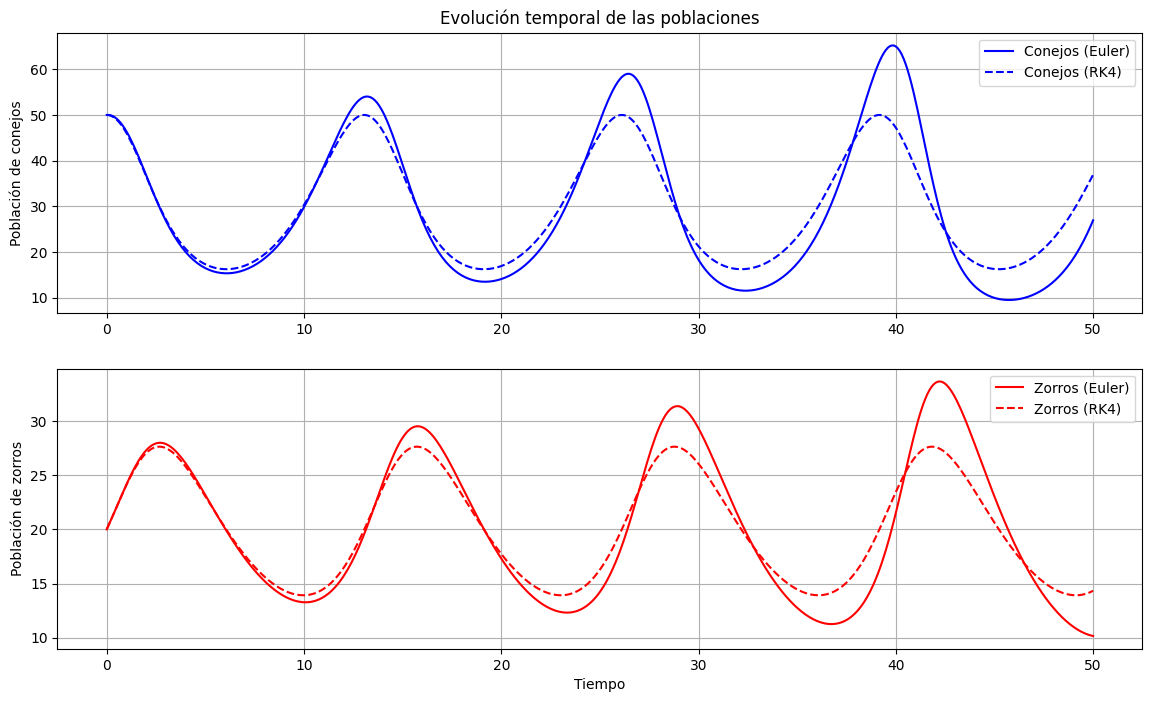

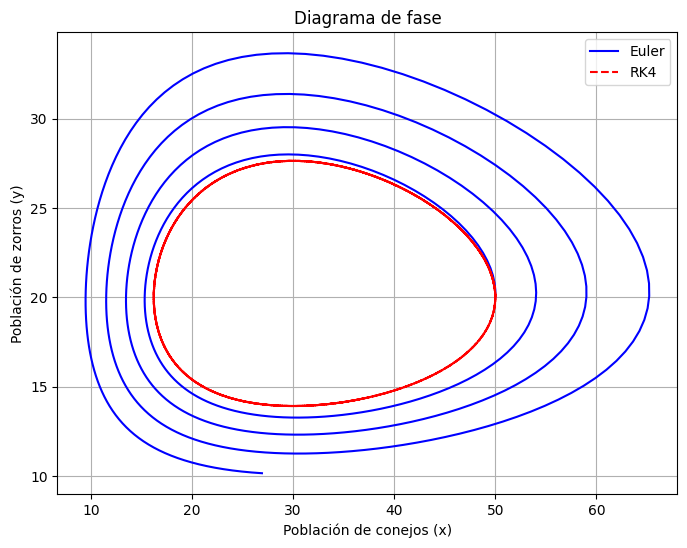

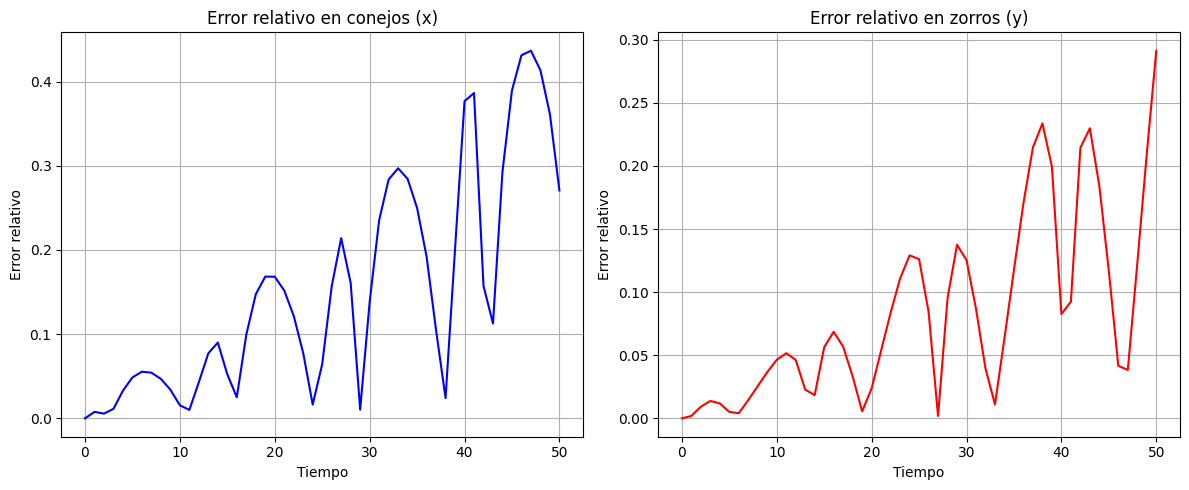

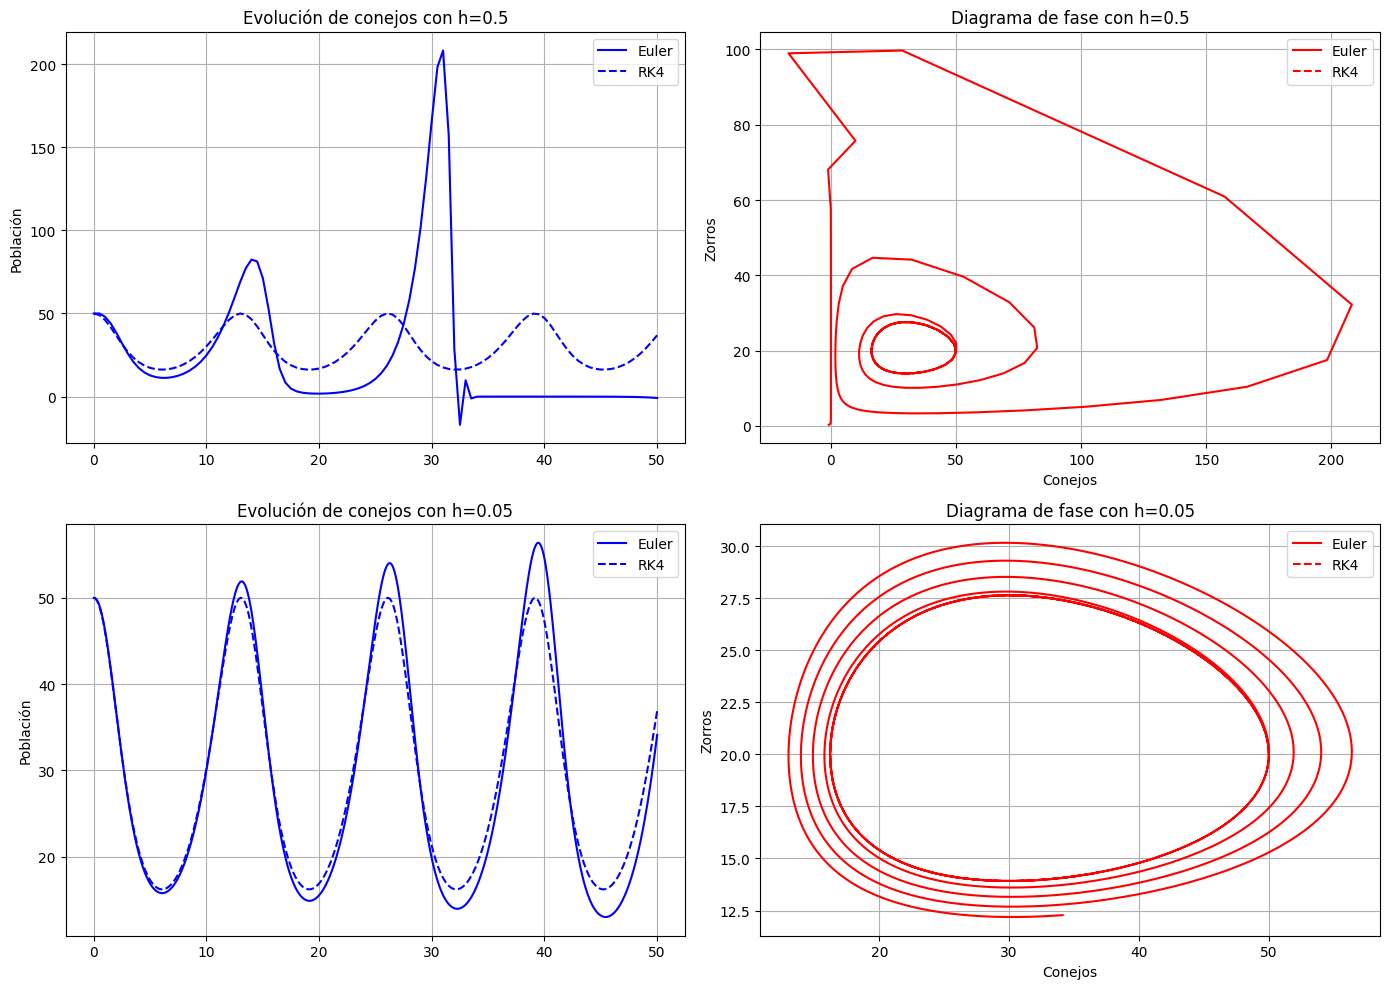

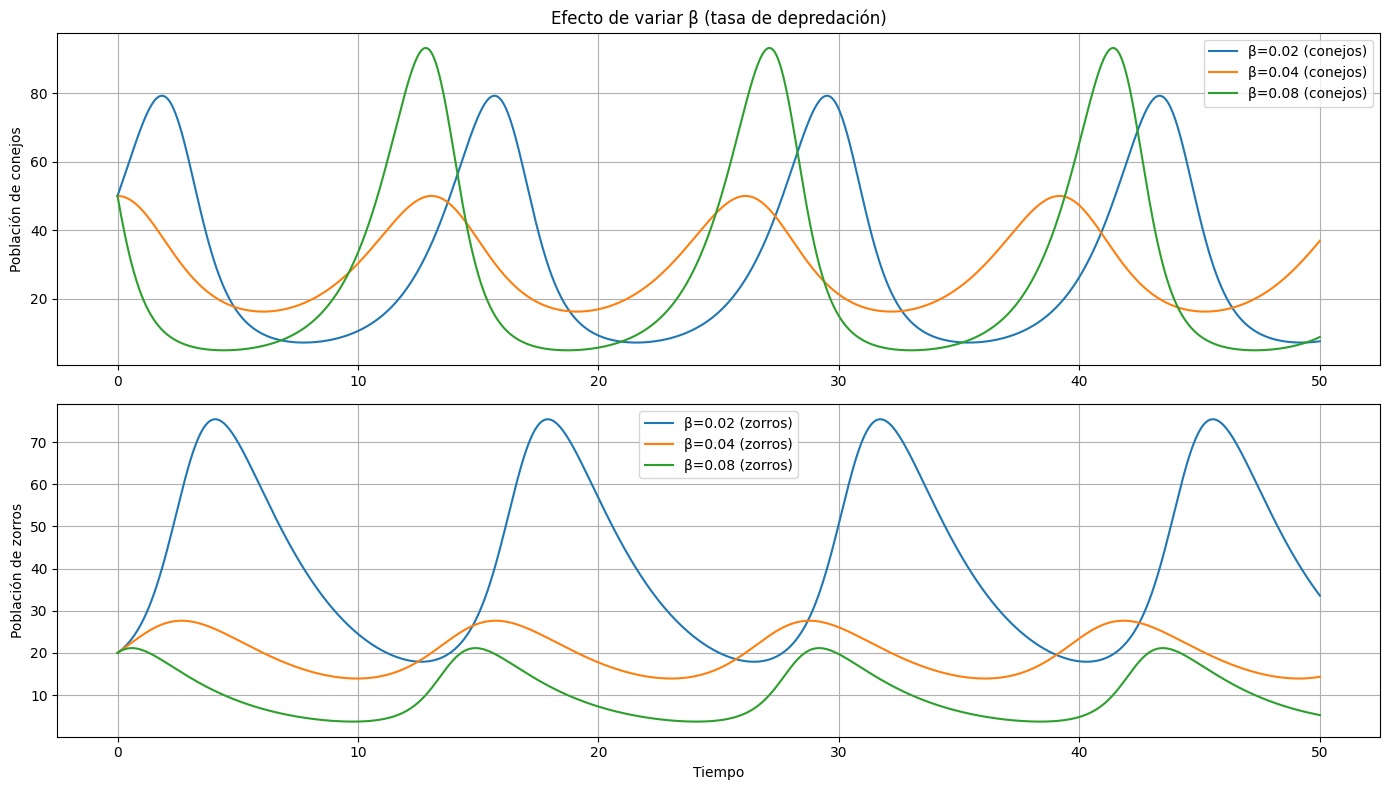

In [ ]:
#Aquí va su código
# Parámetros del sistema
alpha = 0.8    # Tasa de reproducción de conejos
beta = 0.04    # Tasa de depredación
gamma = 0.3    # Tasa de mortalidad de zorros
delta = 0.01   # Eficiencia de conversión

# Condiciones iniciales
x0 = 50       # Población inicial de conejos
y0 = 20       # Población inicial de zorros

# Tiempo de simulación
t_start = 0
t_end = 50

# Método de Euler
def euler_step(f, x, y, t, h):
  """Un paso del método de Euler"""
  dxdt, dydt = f(x, y)
  x_new = x + h * dxdt
  y_new = y + h * dydt
  return x_new, y_new

# Método de Runge-Kutta
def rk2_step(f, x, y, t, h):
  """Un paso del método de Runge-Kutta de segundo orden (Heun)"""
  k1x, k1y = f(x, y)
  k2x, k2y = f(x + h*k1x, y + h*k1y)
  x_new = x + (h/2) * (k1x + k2x)
  y_new = y + (h/2) * (k1y + k2y)
  return x_new, y_new

def rk4_step(f, x, y, t, h):
  """Un paso del método de Runge-Kutta de cuarto orden"""
  k1x, k1y = f(x, y)
  k2x, k2y = f(x + 0.5*h*k1x, y + 0.5*h*k1y)
  k3x, k3y = f(x + 0.5*h*k2x, y + 0.5*h*k2y)
  k4x, k4y = f(x + h*k3x, y + h*k3y)

  x_new = x + (h/6) * (k1x + 2*k2x + 2*k3x + k4x)
  y_new = y + (h/6) * (k1y + 2*k2y + 2*k3y + k4y)
  return x_new, y_new

# Función que define las ecuaciones del sistema
def predator_prey(x, y):
  dxdt = alpha * x - beta * x * y
  dydt = -gamma * y + delta * x * y
  return dxdt, dydt

def solve_system(method, h=0.1):
  """Resuelve el sistema con el método especificado"""
  t_values = np.arange(t_start, t_end + h, h)
  x_values = np.zeros_like(t_values)
  y_values = np.zeros_like(t_values)

  x_values[0] = x0
  y_values[0] = y0

  for i in range(1, len(t_values)):
      x_values[i], y_values[i] = method(predator_prey, x_values[i-1], y_values[i-1], t_values[i-1], h)

  return t_values, x_values, y_values

# Resolver con los tres métodos
h = 0.1
t_euler, x_euler, y_euler = solve_system(euler_step, h)
t_rk2, x_rk2, y_rk2 = solve_system(rk2_step, h)
t_rk4, x_rk4, y_rk4 = solve_system(rk4_step, h)

# Comparación de resultados

# Gráficas de evolución temporal
plt.figure(figsize=(14, 8))

plt.subplot(2, 1, 1)
plt.plot(t_euler, x_euler, 'b-', label='Conejos (Euler)')
plt.plot(t_rk4, x_rk4, 'b--', label='Conejos (RK4)')
plt.ylabel('Población de conejos')
plt.title('Evolución temporal de las poblaciones')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t_euler, y_euler, 'r-', label='Zorros (Euler)')
plt.plot(t_rk4, y_rk4, 'r--', label='Zorros (RK4)')
plt.xlabel('Tiempo')
plt.ylabel('Población de zorros')
plt.legend()
plt.grid(True)

plt.show()

# Diagrama de fase
plt.figure(figsize=(8, 6))
plt.plot(x_euler, y_euler, 'b-', label='Euler')
plt.plot(x_rk4, y_rk4, 'r--', label='RK4')
plt.xlabel('Población de conejos (x)')
plt.ylabel('Población de zorros (y)')
plt.title('Diagrama de fase')
plt.legend()
plt.grid(True)
plt.show()

# Error relativo
def relative_error(true, approx):
  """Calcula el error relativo"""
  return np.abs((true - approx) / true)

error_x = relative_error(x_rk4[::10], x_euler[::10])  # Muestreo cada 10 puntos
error_y = relative_error(y_rk4[::10], y_euler[::10])

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(t_euler[::10], error_x, 'b-')
plt.xlabel('Tiempo')
plt.ylabel('Error relativo')
plt.title('Error relativo en conejos (x)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(t_euler[::10], error_y, 'r-')
plt.xlabel('Tiempo')
plt.ylabel('Error relativo')
plt.title('Error relativo en zorros (y)')
plt.grid(True)

plt.tight_layout()
plt.show()

#Estabilidad con diferentes pasos temporales
h_values = [0.5, 0.05]

plt.figure(figsize=(14, 10))
for i, h in enumerate(h_values, 1):
    t_euler_h, x_euler_h, y_euler_h = solve_system(euler_step, h)
    t_rk4_h, x_rk4_h, y_rk4_h = solve_system(rk4_step, h)

    plt.subplot(2, 2, 2*i-1)
    plt.plot(t_euler_h, x_euler_h, 'b-', label='Euler')
    plt.plot(t_rk4_h, x_rk4_h, 'b--', label='RK4')
    plt.title(f'Evolución de conejos con h={h}')
    plt.ylabel('Población')
    plt.legend()
    plt.grid(True)

    plt.subplot(2, 2, 2*i)
    plt.plot(x_euler_h, y_euler_h, 'r-', label='Euler')
    plt.plot(x_rk4_h, y_rk4_h, 'r--', label='RK4')
    plt.title(f'Diagrama de fase con h={h}')
    plt.xlabel('Conejos')
    plt.ylabel('Zorros')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

#Variación de parámetros
# Vamos a variar beta (tasa de depredación)
beta_values = [0.02, 0.04, 0.08]

plt.figure(figsize=(14, 8))
for beta_val in beta_values:
  # Definir nueva función con el beta modificado
  def predator_prey_var_beta(x, y):
      dxdt = alpha * x - beta_val * x * y
      dydt = -gamma * y + delta * x * y
      return dxdt, dydt

  # Resolver con RK4
  t_values = np.arange(t_start, t_end + h, h)
  x_values = np.zeros_like(t_values)
  y_values = np.zeros_like(t_values)
  x_values[0] = x0
  y_values[0] = y0

  for i in range(1, len(t_values)):
      x_values[i], y_values[i] = rk4_step(predator_prey_var_beta, x_values[i-1], y_values[i-1], t_values[i-1], h)

  plt.subplot(2, 1, 1)
  plt.plot(t_values, x_values, label=f'β={beta_val} (conejos)')

  plt.subplot(2, 1, 2)
  plt.plot(t_values, y_values, label=f'β={beta_val} (zorros)')

plt.subplot(2, 1, 1)
plt.ylabel('Población de conejos')
plt.title('Efecto de variar β (tasa de depredación)')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.xlabel('Tiempo')
plt.ylabel('Población de zorros')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 6.

El oscilador armónico forzado amortiguado está dado por la siguiente ecuación:

$$\frac{d^{2}x}{dt^{2}} + \gamma \frac{dx}{dt} + \omega_{0}^{2} x = \frac{F}{m},$$

donde $\gamma$ es la constante de amortiguamiento, $\omega_{0} = \sqrt{k/m}$ es la frecuencia angular natural, $m$ es la masa y $F$ es la fuerza impulsora. Esta ecuación de segundo orden también puede escribirse con dos ecuaciones de primer orden:

$$
\frac{dx}{dt} = v
$$

$$
\frac{dv}{dt} = \frac{F}{m} - \gamma v - \omega_{0}^{2} x
$$

que es la forma que usaremos para la integración numérica.

La energía del oscilador armónico es:

$$
E = \frac{1}{2} m v^{2} + \frac{1}{2} k x^{2},
$$

Considere $x(0)=0$ y $v(0)=1$. Grafique $x(t)$ y $E(t)$ para los siguientes casos:

- $F=0$ y para $\gamma=[0,0.05,0.3]$.
- $\gamma=0$, $F=F_0\cos{(\omega t)} \ e^{-t^2/T^2}$ con $F_0=1N$, $T=10s$ y $\omega=[0,0.8\omega_0,\omega_0]$.


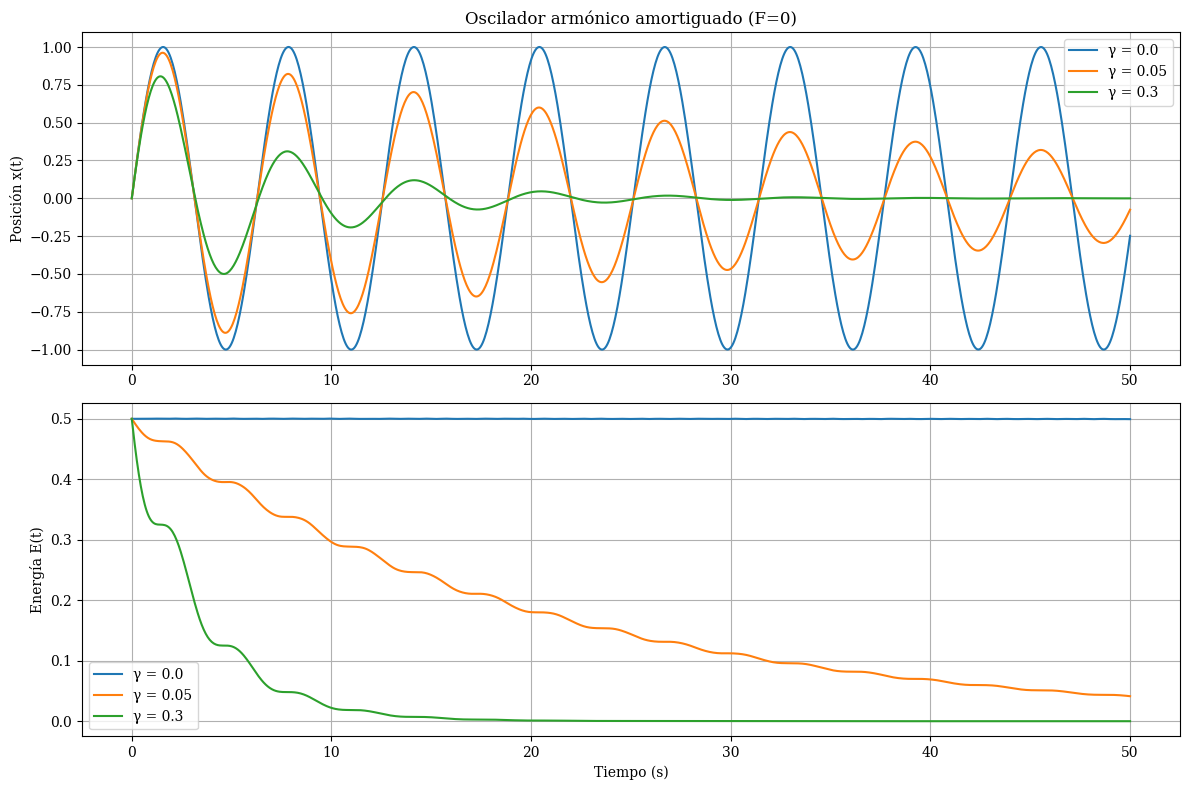

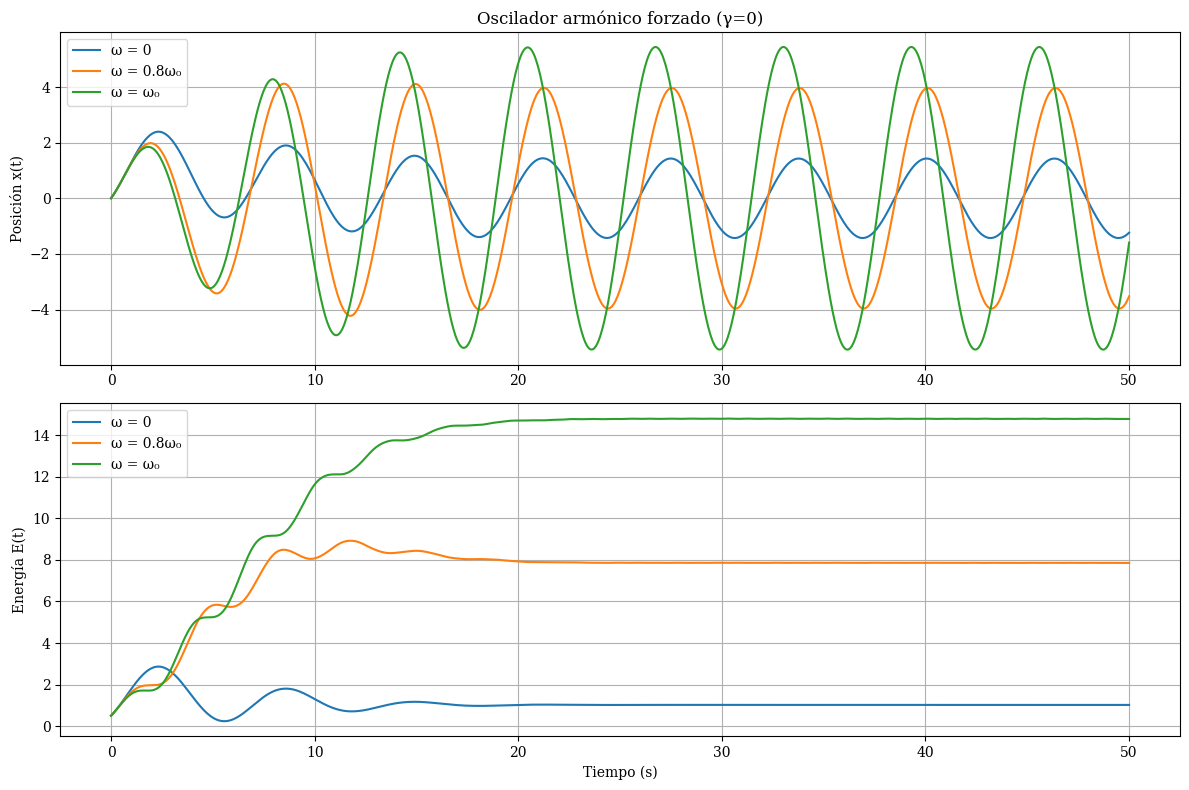

In [ ]:
#Aquí va su código
from matplotlib import rcParams

# Configuración de estilo
rcParams['font.family'] = 'serif'
rcParams['mathtext.fontset'] = 'cm'

# Parámetros del sistema
m = 1.0  # masa
k = 1.0  # constante del resorte
omega0 = np.sqrt(k/m)  # frecuencia natural

# Condiciones iniciales
x0 = 0.0  # posición inicial
v0 = 1.0  # velocidad inicial
y0 = [x0, v0]  # vector de condiciones iniciales

# Tiempo de simulación
t_start = 0.0
t_end = 50.0
t_points = 1000
t_eval = np.linspace(t_start, t_end, t_points)

# Función para el sistema de ecuaciones diferenciales
def harmonic_oscillator(t, y, gamma, F_func=None):
    x, v = y
    dxdt = v

    # Calculamos la fuerza si se proporciona una función
    F = 0.0
    if F_func is not None:
        F = F_func(t)

    dvdt = F/m - gamma*v - omega0**2 * x
    return [dxdt, dvdt]

# Función para calcular la energía
def calculate_energy(x, v):
    kinetic = 0.5 * m * v**2
    potential = 0.5 * k * x**2
    return kinetic + potential

# Caso 1: F = 0, diferentes valores de gamma
gammas = [0.0, 0.05, 0.3]
plt.figure(figsize=(12, 8))

# Subplot para x(t)
plt.subplot(2, 1, 1)
for gamma in gammas:
    sol = solve_ivp(harmonic_oscillator, [t_start, t_end], y0,
                    args=(gamma, None), t_eval=t_eval)
    plt.plot(sol.t, sol.y[0], label=f'γ = {gamma}')

plt.title('Oscilador armónico amortiguado (F=0)')
plt.ylabel('Posición x(t)')
plt.legend()
plt.grid(True)

# Subplot para E(t)
plt.subplot(2, 1, 2)
for gamma in gammas:
    sol = solve_ivp(harmonic_oscillator, [t_start, t_end], y0,
                    args=(gamma, None), t_eval=t_eval)
    energy = calculate_energy(sol.y[0], sol.y[1])
    plt.plot(sol.t, energy, label=f'γ = {gamma}')

plt.xlabel('Tiempo (s)')
plt.ylabel('Energía E(t)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Caso 2: γ = 0, diferentes frecuencias de fuerza impulsora
F0 = 1.0  # amplitud de la fuerza
T = 10.0  # constante de tiempo

# Definimos la función de fuerza
def force_func(t, omega):
    return F0 * np.exp(-t**2 / T**2) * np.cos(omega * t)

omegas = [0.0, 0.8*omega0, omega0]
omega_labels = ['0', '0.8ω₀', 'ω₀']

plt.figure(figsize=(12, 8))

# Subplot para x(t)
plt.subplot(2, 1, 1)
for omega, label in zip(omegas, omega_labels):
    def force(t): return force_func(t, omega)
    sol = solve_ivp(harmonic_oscillator, [t_start, t_end], y0,
                    args=(0.0, force), t_eval=t_eval)
    plt.plot(sol.t, sol.y[0], label=f'ω = {label}')

plt.title('Oscilador armónico forzado (γ=0)')
plt.ylabel('Posición x(t)')
plt.legend()
plt.grid(True)

# Subplot para E(t)
plt.subplot(2, 1, 2)
for omega, label in zip(omegas, omega_labels):
    def force(t): return force_func(t, omega)
    sol = solve_ivp(harmonic_oscillator, [t_start, t_end], y0,
                    args=(0.0, force), t_eval=t_eval)
    energy = calculate_energy(sol.y[0], sol.y[1])
    plt.plot(sol.t, energy, label=f'ω = {label}')

plt.xlabel('Tiempo (s)')
plt.ylabel('Energía E(t)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 7.

El **problema restringido de tres cuerpos** describe el movimiento de una partícula de masa despreciable bajo la influencia gravitacional de dos cuerpos masivos $m_1$ y $m_2$, que orbitan en trayectorias circulares alrededor de su centro de masa.  

Si tomamos un **sistema de referencia rotante** con velocidad angular $\omega$, cuyo origen está en el centro de masa del sistema y que gira con la misma velocidad angular que los cuerpos principales, las ecuaciones de movimiento de la partícula testigo son:  

$$
\ddot{x} - 2\omega \dot{y} = \frac{\partial U}{\partial x}, \quad  
\ddot{y} + 2\omega \dot{x} = \frac{\partial U}{\partial y},
$$  

donde $U$ es el **potencial efectivo** del sistema, definido como:  

$$
U = -\frac{G m_1}{r_1} - \frac{G m_2}{r_2} - \frac{1}{2} \omega^2 (x^2 + y^2).
$$

Aquí, $r_1$ y $r_2$ son las distancias del cuerpo de prueba a $m_1$ y $m_2$, respectivamente. En un sistema de coordenadas adimensionales donde la distancia entre los cuerpos principales es 1 y la constante gravitacional está absorbida en la normalización, la **velocidad angular del sistema** es:  

$$
\omega^2 = 1.
$$  

Existen cinco **puntos de Lagrange** $(L_1, L_2, L_3, L_4, L_5)$ donde las fuerzas gravitacionales y la aceleración centrífuga se equilibran.  

Los **puntos triangulares** $L_4$ y $L_5$ forman un triángulo equilátero con los cuerpos principales. Si colocamos $m_1$ en $(-\mu,0)$ y $m_2$ en $(1-\mu,0)$ en el sistema rotante, las coordenadas de $L_4$ y $L_5$ son:  

$$
L_4 = \left( \frac{1}{2} - \mu, \frac{\sqrt{3}}{2} \right), \quad  
L_5 = \left( \frac{1}{2} - \mu, -\frac{\sqrt{3}}{2} \right).
$$

Dado que estos puntos forman un triángulo equilátero con los cuerpos masivos, se cumple que la partícula testigo está a la misma distancia de ambos cuerpos:  

$$
r_1 = r_2.
$$


Para estudiar la estabilidad de $L_4$ y $L_5$, introducimos **pequeñas perturbaciones**. Por ejemplo, alrededor de $L_4$:  

$$
x = x_{L_4} + \xi, \quad y = y_{L_4} + \eta.
$$

Sustituyendo en las ecuaciones de movimiento y expandiendo el potencial efectivo en **serie de Taylor** hasta primer orden en $\xi$ y $\eta$, obtenemos el sistema de ecuaciones linealizado:  

$$
\frac{d}{dt}  
\begin{bmatrix}  
\xi \\ \dot{\xi} \\ \eta \\ \dot{\eta}  
\end{bmatrix}  
= \mathbf{A}  
\begin{bmatrix}  
\xi \\ \dot{\xi} \\ \eta \\ \dot{\eta}  
\end{bmatrix},
$$

donde la matriz **$\mathbf{A}$** tiene la forma:

$$
\mathbf{A} =
\begin{bmatrix}
0 & 1 & 0 & 0 \\
a & 0 & b & 2\omega \\
0 & 0 & 0 & 1 \\
c & -2\omega & d & 0
\end{bmatrix}.
$$

Los coeficientes de la matriz $\mathbf{A}$ están dados por las **segundas derivadas parciales del potencial efectivo $U$** evaluadas en $L_4$:

$$
a = \frac{\partial^2 U}{\partial x^2} (L_4), \quad
b = \frac{\partial^2 U}{\partial x \partial y} (L_4),
$$

$$
c = \frac{\partial^2 U}{\partial y \partial x} (L_4), \quad
d = \frac{\partial^2 U}{\partial y^2} (L_4).
$$

Esto mismo se hace para $L_5$- Luego, la estabilidad de $L_4$ y $L_5$ se determina analizando los **valores propios** de la matriz $\mathbf{A}$. Para que estos puntos sean estables, las soluciones deben ser oscilatorias, es decir, los valores propios deben ser imaginarios puros y no contener componentes reales positivas.  

- Encuentre los valores propios de la matriz $\mathbf{A}$ y analice su estabilidad.
- Determine el valor crítico de $\mu_c$ que garantiza la estabilidad de $L_i$ con $i = 4, 5$ para esto varie $\mu$ y examine cuando los valores propios cambian de ser reales a ser complejos. Encuentre dicho valor y compare con el denominado **criterio de Routh**
$$
\mu < \mu_c \approx 0.03852.
$$
- Finalmente, examine la estabilidad de $L_4$ y $L_5$ para el caso del Sol y la Tierra, o el Sol y Jupiter

Valor crítico de μ (aproximado): 0.10000
Valor teórico de Routh: 0.03852


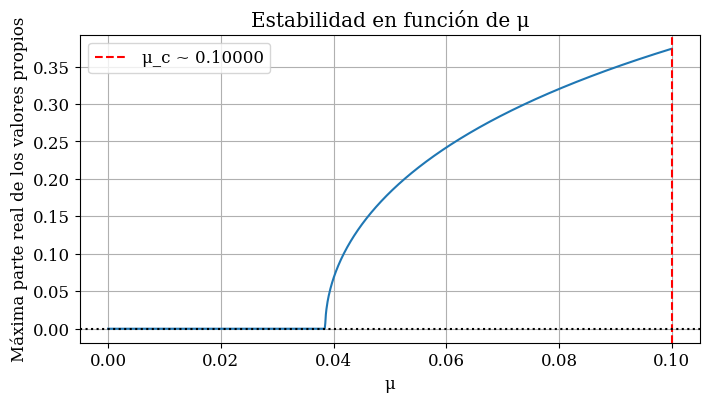


Análisis para el sistema Tierra-Sol (μ ~ 3.003e-6):
Valores propios: [0.00000000e+00+0.99998986j 0.00000000e+00-0.99998986j
 2.37258152e-16+0.00450229j 2.37258152e-16-0.00450229j]


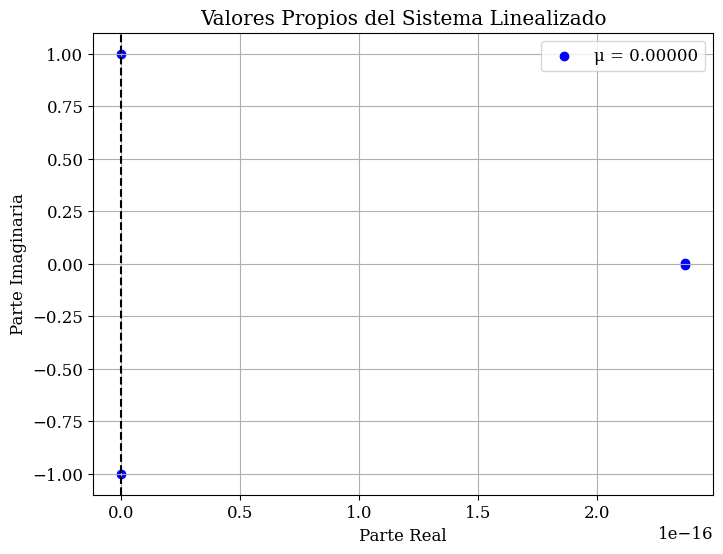


Análisis para el sistema Júpiter-Sol (μ ~ 9.537e-4):
Valores propios: [-9.99200722e-16+0.99675813j -9.99200722e-16-0.99675813j
  1.07764275e-15+0.08045644j  1.07764275e-15-0.08045644j]


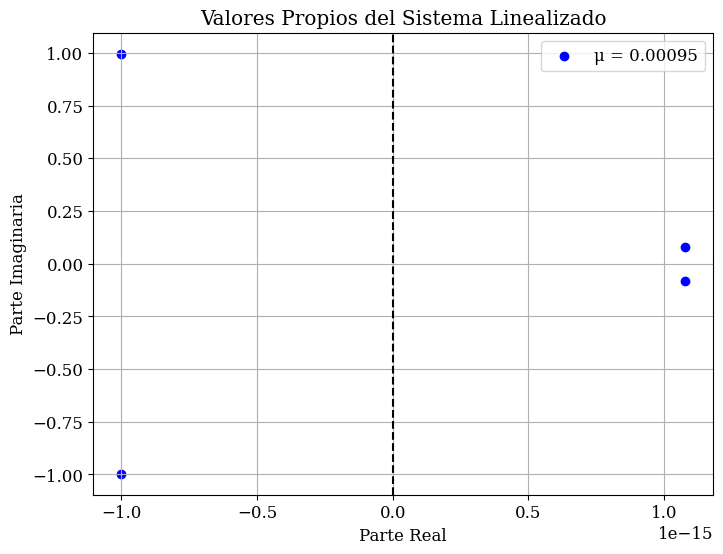


Análisis para μ = μ_c ~ 0.03852:
Valores propios: [-6.22280005e-14+0.70877592j -6.22280005e-14-0.70877592j
  6.25125020e-14+0.70543369j  6.25125020e-14-0.70543369j]


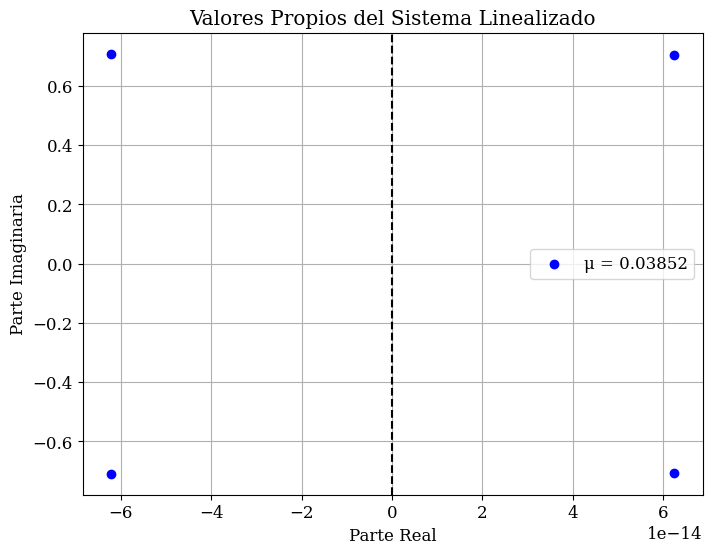

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eig

def matriz_A(mu):
    """Calcula la matriz A del sistema linealizado alrededor de L4/L5"""
    # Segundas derivadas del potencial efectivo evaluadas en L4/L5
    U_xx = 3/4
    U_xy = (3*np.sqrt(3)/4)*(1 - 2*mu)
    U_yy = 9/4

    omega = 1  # Velocidad angular normalizada

    A = np.array([
        [0,     1,    0,    0],
        [U_xx,  0, U_xy, 2*omega],
        [0,     0,    0,    1],
        [U_xy, -2*omega, U_yy, 0]
    ])
    return A

def analizar_estabilidad(mu):
    """Calcula los valores propios para un valor dado de mu"""
    A = matriz_A(mu)
    eigenvalues, _ = eig(A)
    return eigenvalues

def encontrar_mu_critico():
    """Encuentra el valor crítico de mu donde cambia la estabilidad"""
    mu_values = np.linspace(0, 0.1, 1000)
    max_real_parts = []
    mu_c = None  # inicializa  mu_c en ninguno

    for mu in mu_values:
        eigenvalues = analizar_estabilidad(mu)
        max_real = max(np.abs(np.real(eigenvalues)))
        max_real_parts.append(max_real)

    # Encontrar donde la parte real máxima cruza el umbral (aproximadamente cero)
    for i in range(1, len(mu_values)):
        if max_real_parts[i-1] > 1e-3 and max_real_parts[i] < 1e-3:
            mu_c = mu_values[i]
            break

    if mu_c is None:
        print("Warning: Could not find a critical mu value within the given range.")

        mu_c = mu_values[-1] # regresa el ultimo valor de mu

    return mu_c, mu_values, max_real_parts

def plot_valores_propios(mu):
    """Grafica los valores propios para un valor específico de mu"""
    eigenvalues = analizar_estabilidad(mu)

    plt.figure(figsize=(8, 6))
    plt.scatter(np.real(eigenvalues), np.imag(eigenvalues),
                c='b', label=f'μ = {mu:.5f}')
    plt.axvline(0, color='k', linestyle='--')
    plt.xlabel('Parte Real')
    plt.ylabel('Parte Imaginaria')
    plt.title('Valores Propios del Sistema Linealizado')
    plt.grid(True)
    plt.legend()
    plt.show()

# Análisis para diferentes casos
if __name__ == "__main__":
    # 1. Encontrar el valor crítico de μ
    mu_c, mu_values, max_real_parts = encontrar_mu_critico()
    print(f"Valor crítico de μ (aproximado): {mu_c:.5f}")
    print(f"Valor teórico de Routh: 0.03852")

    # Graficar cómo cambia la parte real máxima con μ
    plt.figure(figsize=(8, 4))
    plt.plot(mu_values, max_real_parts)
    plt.axvline(mu_c, color='r', linestyle='--', label=f'μ_c ~ {mu_c:.5f}')
    plt.axhline(0, color='k', linestyle=':')
    plt.xlabel('μ')
    plt.ylabel('Máxima parte real de los valores propios')
    plt.title('Estabilidad en función de μ')
    plt.grid(True)
    plt.legend()
    plt.show()

    # 2. Analizar casos específicos
    # Tierra-Sol: μ ~ 3.003e-6
    mu_tierra = 3.003e-6
    print("\nAnálisis para el sistema Tierra-Sol (μ ~ 3.003e-6):")
    valores_tierra = analizar_estabilidad(mu_tierra)
    print("Valores propios:", valores_tierra)
    plot_valores_propios(mu_tierra)

    # Júpiter-Sol: μ ~ 9.537e-4
    mu_jupiter = 9.537e-4
    print("\nAnálisis para el sistema Júpiter-Sol (μ ~ 9.537e-4):")
    valores_jupiter = analizar_estabilidad(mu_jupiter)
    print("Valores propios:", valores_jupiter)
    plot_valores_propios(mu_jupiter)

    # Valor crítico
    print("\nAnálisis para μ = μ_c ~ 0.03852:")
    valores_critico = analizar_estabilidad(0.03852)
    print("Valores propios:", valores_critico)
    plot_valores_propios(0.03852)

5j


# 8.

En la dinámica galáctica, el disco de una galaxia espiral puede presentar pequeñas perturbaciones que dan lugar a oscilaciones y ondas de densidad. Estas oscilaciones están gobernadas por la **ecuación de Jeans** en un disco delgado, que describe la evolución de perturbaciones en la densidad superficial $\Sigma(r,t)$ y la velocidad en presencia de la auto-gravitación del disco.  

Bajo la aproximación de pequeñas perturbaciones alrededor de un estado de equilibrio, las ecuaciones hidrodinámicas del sistema conducen a la ecuación diferencial:  

$$
\frac{d^2 \Sigma}{dt^2} + \kappa^2 \Sigma = 0,
$$

donde $\kappa$ es la **frecuencia de epicíclo**, que depende de la rotación del disco y describe la oscilación de una partícula en el plano del disco bajo pequeñas desviaciones de su órbita circular.  Muchas galaxias espirales presentan una curva de rotación aproximadamente **plana** a grandes radios, es decir, la velocidad de rotación $V(r)$ es aproximadamente constante:

$$
V(r) \approx V_0.
$$

En este caso, la frecuencia de epicíclo se puede aproximar como:

$$
\kappa \approx \sqrt{2} \Omega,
$$

donde:

$$
\Omega = \frac{V_0}{r}.
$$

- Graficar la evolución temporal de $\Sigma(t)$.  
- Calcular los valores propios de la matriz del sistema y discutir su relación con la estabilidad del disco.  
- Comparar los resultados numéricos con la solución analítica de la ecuación diferencial.  
- Analizar cómo cambia la estabilidad del sistema al modificar $\kappa$.  


Parámetros del sistema:
Velocidad de rotación V0 = 220 km/s
Radio r = 8 kpc
Frecuencia angular Ω = V0/r = 27.500 km/s/kpc
Frecuencia de epiciclo κ = √2Ω = 38.891 km/s/kpc
Periodo de oscilación T = 2π/κ = 0.162 Myr


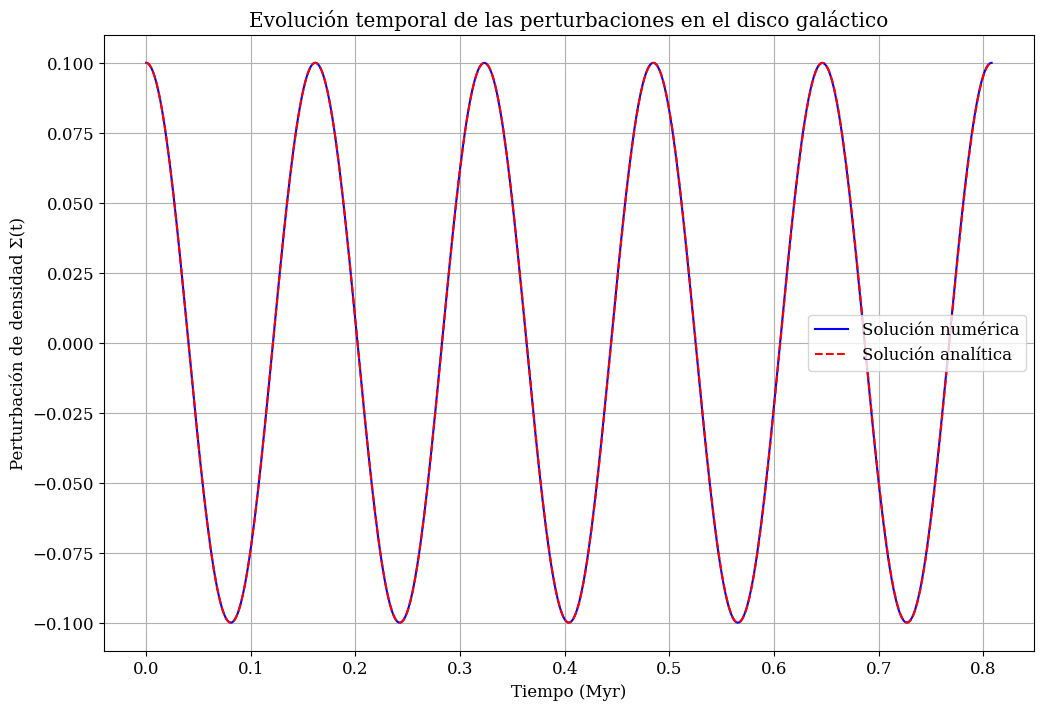

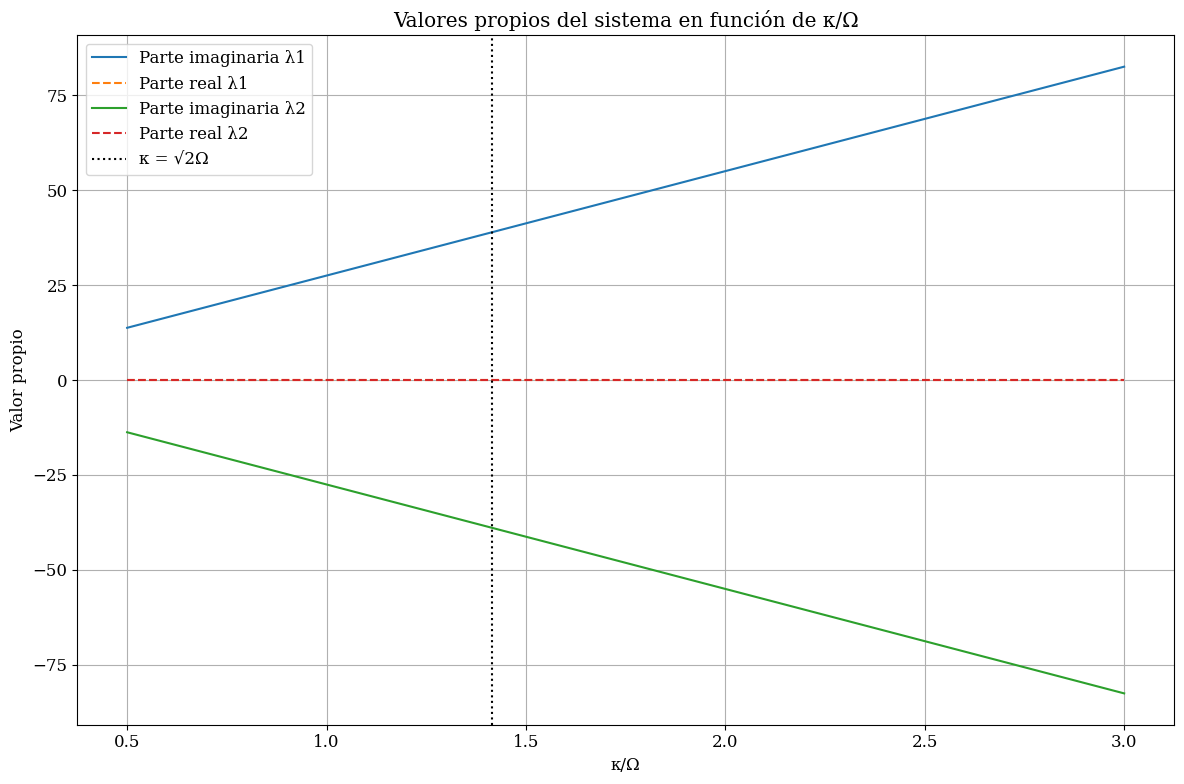

In [ ]:
#Aquí va su
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.linalg import eig

# Configuración de estilo
# plt.style.use('seaborn') # Removed as it is not a valid style
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 12

## 1. Parámetros del sistema
V0 = 220  # km/s, velocidad de rotación típica para una galaxia espiral
r = 8  # kpc, radio típico del Sol en la Vía Láctea
Omega = V0/r  # Frecuencia angular
kappa = np.sqrt(2) * Omega  # Frecuencia de epiciclo

## 2. Solución analítica
def analytical_solution(t, Sigma0, dSigma0):
  """Solución analítica de la ecuación diferencial"""
  return Sigma0 * np.cos(kappa*t) + (dSigma0/kappa) * np.sin(kappa*t)

# Sistema de ecuaciones para integración numérica
def disk_oscillations(t, y, kappa):
  """Sistema de ecuaciones diferenciales de primer orden"""
  Sigma, dSigma = y
  dydt = [dSigma, -kappa**2 * Sigma]
  return dydt

# Matriz del sistema para análisis de valores propios
def system_matrix(kappa):
  """Matriz del sistema para análisis de estabilidad"""
  return np.array([
      [0, 1],
      [-kappa**2, 0]
  ])

# Análisis de estabilidad
def analyze_stability(kappa_values):
  """Analiza la estabilidad para diferentes valores de kappa"""
  eigenvalues = []

  for k in kappa_values:
      A = system_matrix(k)
      eigvals = eig(A)[0]
      eigenvalues.append(eigvals)

  return eigenvalues

# Simulación y gráficos
def simulate_and_plot():
  """Realiza la simulación y genera los gráficos"""
  # Condiciones iniciales
  Sigma0 = 0.1  # Perturbación inicial en densidad superficial
  dSigma0 = 0.0  # Derivada inicial

  # Tiempo de integración
  t_span = [0, 2*np.pi/kappa * 5]  # 5 periodos de oscilación
  t_eval = np.linspace(t_span[0], t_span[1], 500)

  # Solución numérica
  sol = solve_ivp(disk_oscillations, t_span, [Sigma0, dSigma0],
                  args=(kappa,), t_eval=t_eval, method='RK45')

  # Solución analítica
  Sigma_analytical = analytical_solution(t_eval, Sigma0, dSigma0)

  # Gráfico de la evolución temporal
  plt.figure()
  plt.plot(sol.t, sol.y[0], 'b-', label='Solución numérica')
  plt.plot(t_eval, Sigma_analytical, 'r--', label='Solución analítica')
  plt.xlabel('Tiempo (Myr)')
  plt.ylabel('Perturbación de densidad Σ(t)')
  plt.title('Evolución temporal de las perturbaciones en el disco galáctico')
  plt.legend()
  plt.grid(True)

  # Análisis de valores propios
  kappa_values = np.linspace(0.5*Omega, 3*Omega, 50)
  eigenvalues = analyze_stability(kappa_values)

  # Separar partes reales e imaginarias
  real_parts = np.array([np.real(eigvals) for eigvals in eigenvalues])
  imag_parts = np.array([np.imag(eigvals) for eigvals in eigenvalues])

  # Gráfico de valores propios
  plt.figure()
  for i in range(2):  # Para cada valor propio
      plt.plot(kappa_values/Omega, imag_parts[:,i], label=f'Parte imaginaria λ{i+1}')
      plt.plot(kappa_values/Omega, real_parts[:,i], '--', label=f'Parte real λ{i+1}')

  plt.axvline(x=np.sqrt(2), color='k', linestyle=':', label='κ = √2Ω')
  plt.xlabel('κ/Ω')
  plt.ylabel('Valor propio')
  plt.title('Valores propios del sistema en función de κ/Ω')
  plt.legend()
  plt.grid(True)

  plt.tight_layout()
  plt.show()

## Ejecución principal
if __name__ == "__main__":
  print(f"Parámetros del sistema:")
  print(f"Velocidad de rotación V0 = {V0} km/s")
  print(f"Radio r = {r} kpc")
  print(f"Frecuencia angular Ω = V0/r = {Omega:.3f} km/s/kpc")
  print(f"Frecuencia de epiciclo κ = √2Ω = {kappa:.3f} km/s/kpc")
  print(f"Periodo de oscilación T = 2π/κ = {2*np.pi/kappa:.3f} Myr")

  simulate_and_plot()

# 9.
El método *Leapfrog* (o salto de rana) es un algoritmo numérico de segundo orden utilizado para integrar ecuaciones diferenciales ordinarias, especialmente en problemas de mecánica clásica donde se conserva la energía. Este método es particularmente útil para sistemas Hamiltonianos.

Considere la siguiente ecuación diferencial de segundo orden:
$$
\frac{d^2 x}{dt^2} = f(x),
$$
la cual puede descomponerse en un sistema acoplado de ecuaciones de primer orden:
$$
\frac{dx}{dt} = v, \quad \frac{dv}{dt} = f(x).
$$

El método Leapfrog actualiza las variables en pasos intercalados de tiempo ($\Delta t$) mediante las siguientes fórmulas:
$$
v_{n+1/2} = v_{n-1/2} + f(x_n) \Delta t,
$$
$$
x_{n+1} = x_n + v_{n+1/2} \Delta t.
$$

Escriba un programa en Python que utilice el método Leapfrog para resolver el problema del oscilador armónico, donde $f(x) = -\omega^2 x$ con $\omega = 2$ rad/s. Use condiciones iniciales $x(0) = 1$ y $v(0) = 0$, y un paso de tiempo $\Delta t = 0.01$ s en el intervalo $t \in [0, 10]$ s.


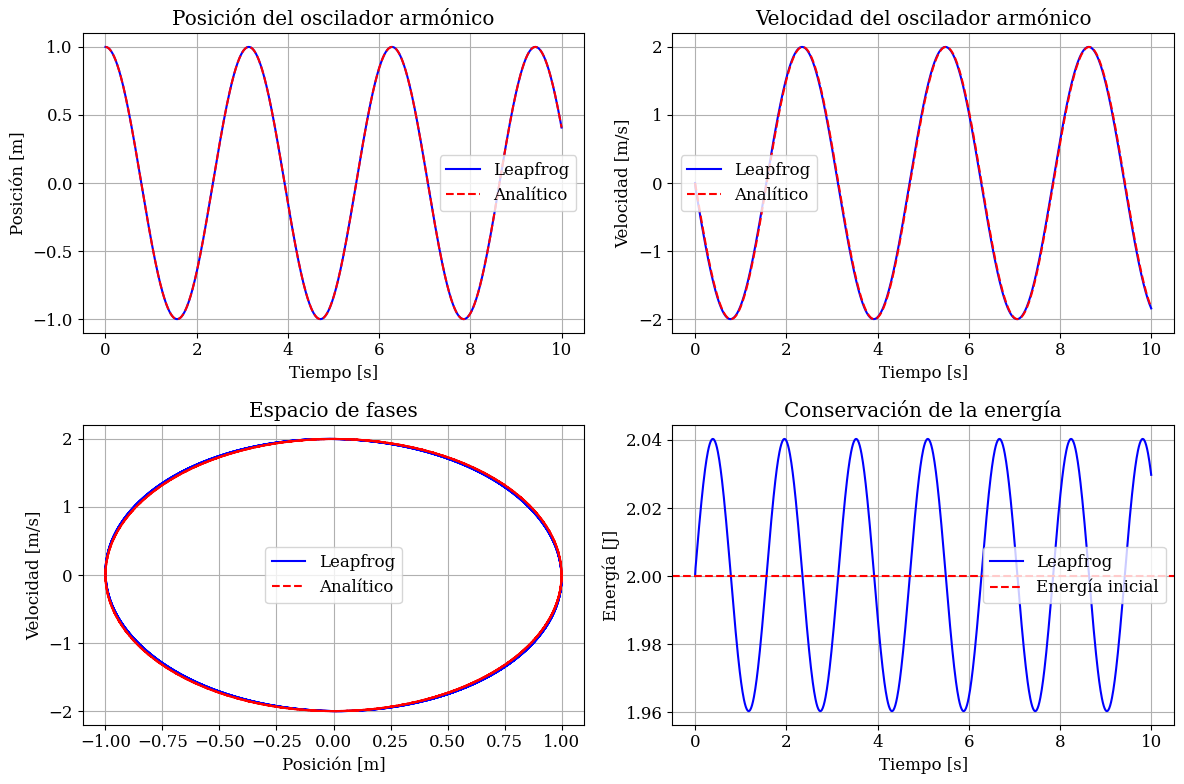

Error máximo en la conservación de energía: 4.03e-02 J


In [ ]:
#Aquí va su código
# Parámetros del sistema
omega = 2.0  # Frecuencia angular [rad/s]
dt = 0.01    # Paso de tiempo [s]
t_max = 10.0 # Tiempo máximo de simulación [s]
steps = int(t_max/dt)  # Número total de pasos

# Condiciones iniciales
x0 = 1.0  # Posición inicial
v0 = 0.0  # Velocidad inicial

# Inicialización de arrays para almacenar resultados
t = np.linspace(0, t_max, steps+1)
x = np.zeros(steps+1)
v = np.zeros(steps+1)

# Condiciones iniciales
x[0] = x0
# Para el método Leapfrog necesitamos v en el paso n+1/2
v_half = v0 - 0.5 * omega**2 * x0 * dt  # Inicialización especial

# Implementación del método Leapfrog
for n in range(steps):
    # Actualización de la posición (paso completo)
    x[n+1] = x[n] + v_half * dt

    # Fuerza en la nueva posición
    force = -omega**2 * x[n+1]

    # Actualización de la velocidad (medio paso)
    v_half = v_half + force * dt

    # Almacenamos la velocidad en tiempo entero (para graficar)
    v[n+1] = v_half + 0.5 * force * dt

# Solución analítica para comparación
x_analytical = x0 * np.cos(omega * t)
v_analytical = -x0 * omega * np.sin(omega * t)

# Energía total (debe conservarse)
E = 0.5 * (v**2 + omega**2 * x**2)
E_initial = E[0]

# Gráficos
plt.figure(figsize=(12, 8))

# Posición vs tiempo
plt.subplot(2, 2, 1)
plt.plot(t, x, 'b-', label='Leapfrog')
plt.plot(t, x_analytical, 'r--', label='Analítico')
plt.xlabel('Tiempo [s]')
plt.ylabel('Posición [m]')
plt.title('Posición del oscilador armónico')
plt.legend()
plt.grid(True)

# Velocidad vs tiempo
plt.subplot(2, 2, 2)
plt.plot(t, v, 'b-', label='Leapfrog')
plt.plot(t, v_analytical, 'r--', label='Analítico')
plt.xlabel('Tiempo [s]')
plt.ylabel('Velocidad [m/s]')
plt.title('Velocidad del oscilador armónico')
plt.legend()
plt.grid(True)

# Espacio de fases
plt.subplot(2, 2, 3)
plt.plot(x, v, 'b-', label='Leapfrog')
plt.plot(x_analytical, v_analytical, 'r--', label='Analítico')
plt.xlabel('Posición [m]')
plt.ylabel('Velocidad [m/s]')
plt.title('Espacio de fases')
plt.legend()
plt.grid(True)

# Conservación de energía
plt.subplot(2, 2, 4)
plt.plot(t, E, 'b-', label='Leapfrog')
plt.axhline(E_initial, color='r', linestyle='--', label='Energía inicial')
plt.xlabel('Tiempo [s]')
plt.ylabel('Energía [J]')
plt.title('Conservación de la energía')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Error en la energía
max_energy_error = np.max(np.abs(E - E_initial))
print(f"Error máximo en la conservación de energía: {max_energy_error:.2e} J")